In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from sklearn import linear_model

plt.rc('figure', figsize = (5, 4))

# Etude des résidus : regressions linéaires des input sur l'output FUEL FLOW

#### Calcul des résidus linéaires pour les différents input 

In [2]:
path = '/Users/mayliscotadze/Documents/Safran/'
df = pd.read_csv(path + 'all_datas_cleaned.csv', sep=",", header=0, encoding="latin 1")
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [3]:
df1 = df.set_index('n_vol')

In [40]:
df1 = df1.drop('power', axis = 1)
df1 = df1.dropna()

In [104]:
df_phase0 = df1[df1.phase == 0]
df_phase1 = df1[df1.phase == 1]

In [7]:
input = ["static pressure", "air speed",
          "rotation speed", "outside temp", "n2", "n1", "torque",
          "turbine temp", "oil pressure", "oil temp", "ground speed", "altitude"]

In [111]:
def reg_lin(input, df, output):
    
    reg_coef = pd.DataFrame( columns = input)
    residus = pd.DataFrame(index = df.index, columns = input)
    regr = linear_model.LinearRegression()
    
    for flight in set(df.index):
        
            for el in input:
                y = df.ix[flight, output]
                X = df.ix[flight, el].reshape(df.ix[flight].shape[0], 1)
                regr.fit(X, y)
                reg_coef.ix[flight, el] = regr.coef_[0]
                vec = (y - regr.predict(X)).reshape(y.shape[0],1)
                residus.ix[flight, el] = np.apply_along_axis(np.linalg.norm, 1, vec)    
    
    return reg_coef, residus

In [112]:
input = [ "torque", "n1", "rotation speed"]

In [105]:
# En phase 1
reg_coef_1, residus_1 = reg_lin(input, df_phase1, 'fuel flow')

In [108]:
residus_1.head()

,torque,n1,rotation speed
n_vol,,,
0001-3.csv,5.13594,5.50752,11.5589
0001-3.csv,5.90586,4.54557,10.7999
0001-3.csv,3.08113,1.67958,4.74084
0001-3.csv,4.79295,5.47554,1.38179
0001-3.csv,5.16396,3.94962,6.08179


In [109]:
reg_coef_1.head()

,torque,n1,rotation speed
0332-2.csv,1.31899,5.92952,-2.37153
0472-2.csv,1.30076,3.97821,0.273777
0313-3.csv,1.28726,6.24871,0.668975
0558-3.csv,1.4009,4.20349,0.719552
0135-2.csv,1.41271,1.35449,0.32246


In [191]:
reg_coef_1.reset_index().to_csv('reg_coef_1.csv', sep=',')
residus_1.reset_index().to_csv('residus_1.csv', sep=',')

In [115]:
#reg_coef_0, residus_0 = reg_lin(input, df_phase0, 'fuel flow')

## Visualisation Résidus phase 1 contre autre input

#### Visualisation des résidus de Torque (regression linéaire de Torque sur Débit) en fonction de l'outside temp en phase 1

In [ ]:
df = pd.read_csv(path + 'df_clusters.csv', sep=",", header=0, encoding="latin 1")

In [192]:
def viz_flight_residus(input_res, var, residus_1, df_phase1):
    
    flight = list(set(residus_1.index))[0:30]
    ncol = 4
    nrow = 3
    fig, axes = plt.subplots(nrow, ncol, figsize=(15, 10))
    k=0
    for i in range(nrow):
        for j in range(ncol):
            df = pd.concat([df_phase1.ix[flight[k], var], residus_1.ix[flight[k], input_res]], axis = 1)
            df.plot(kind = "scatter", x = var, y = input_res, ax=axes[i][j], alpha = 0.7, xticks = [], yticks = [])    
            k += 1            

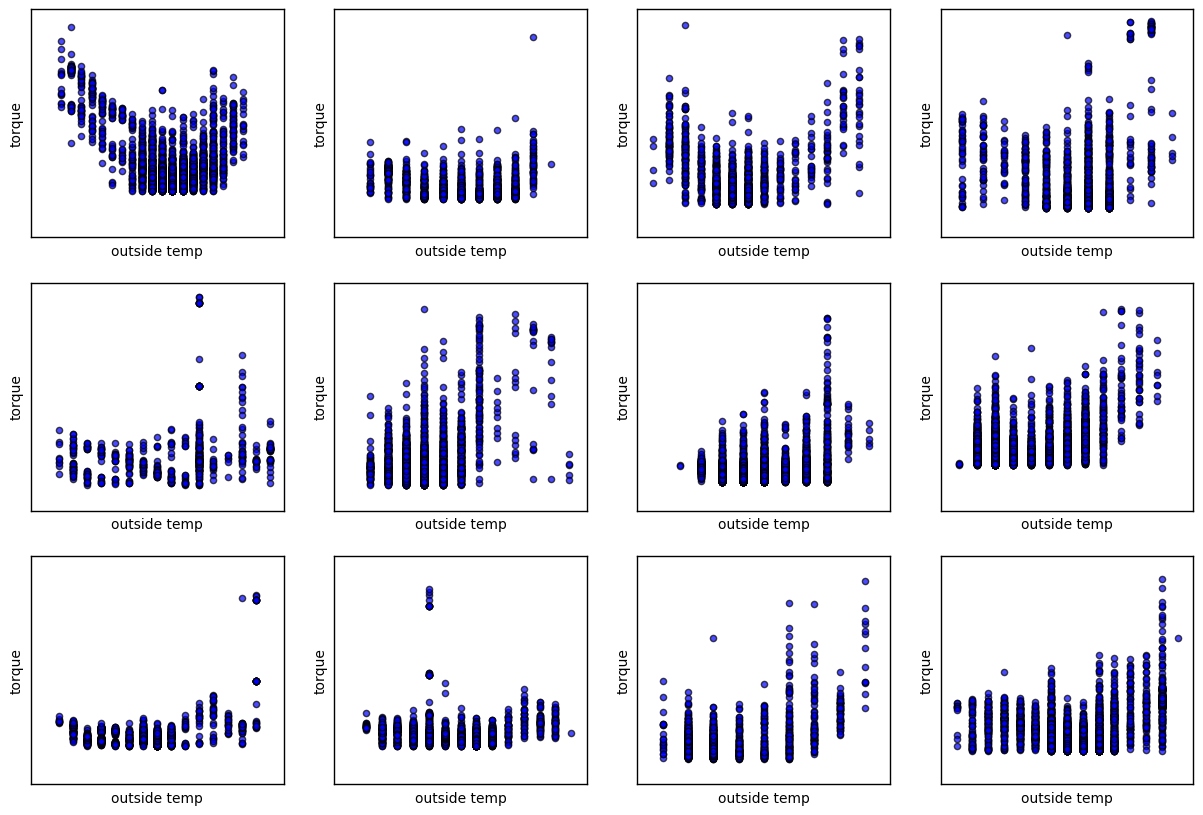

In [193]:
viz_flight_residus('torque', 'outside temp', residus_1, df_phase1)

#### Visualisation des résidus de Torque (regression linéaire de Torque sur Débit) en fonction de air speed

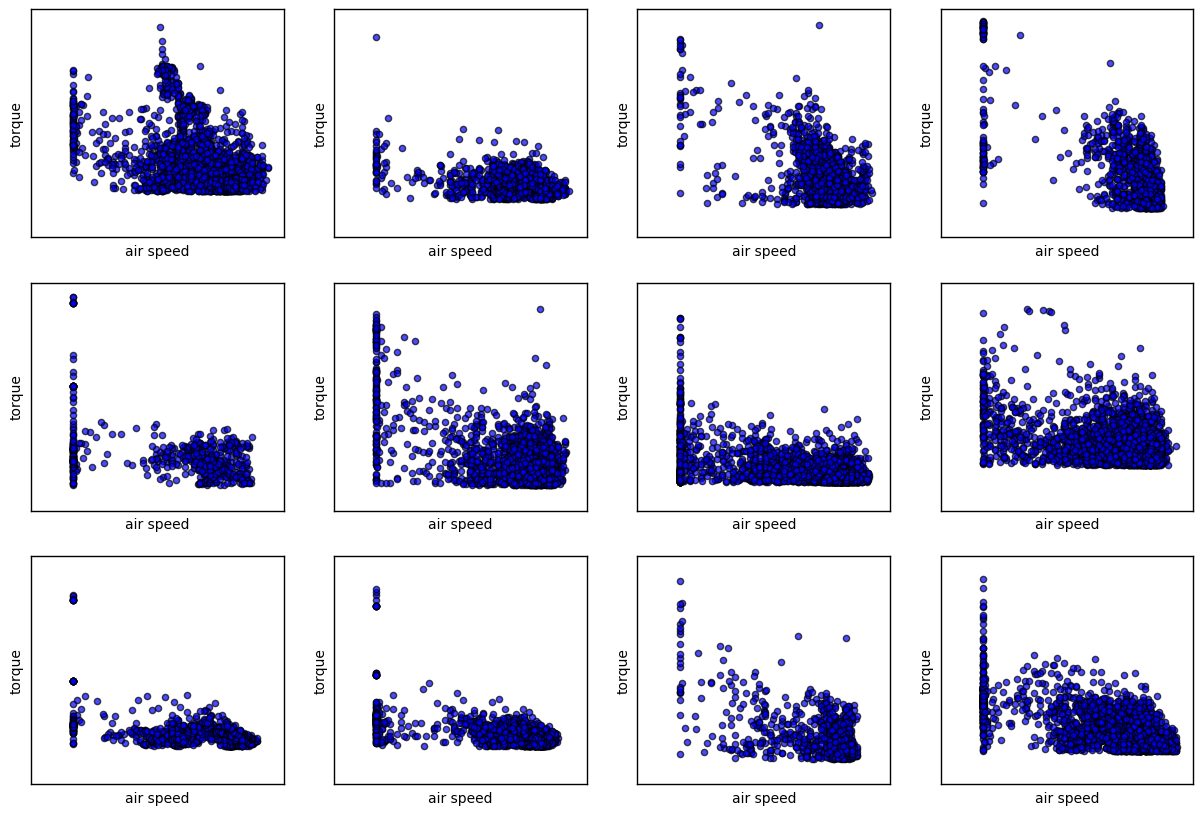

In [194]:
viz_flight_residus('torque', 'air speed', residus_1, df_phase1)

#### Visualisation des résidus de Torque (regression linéaire de Torque sur Débit) en fonction de static pressure en phase 1

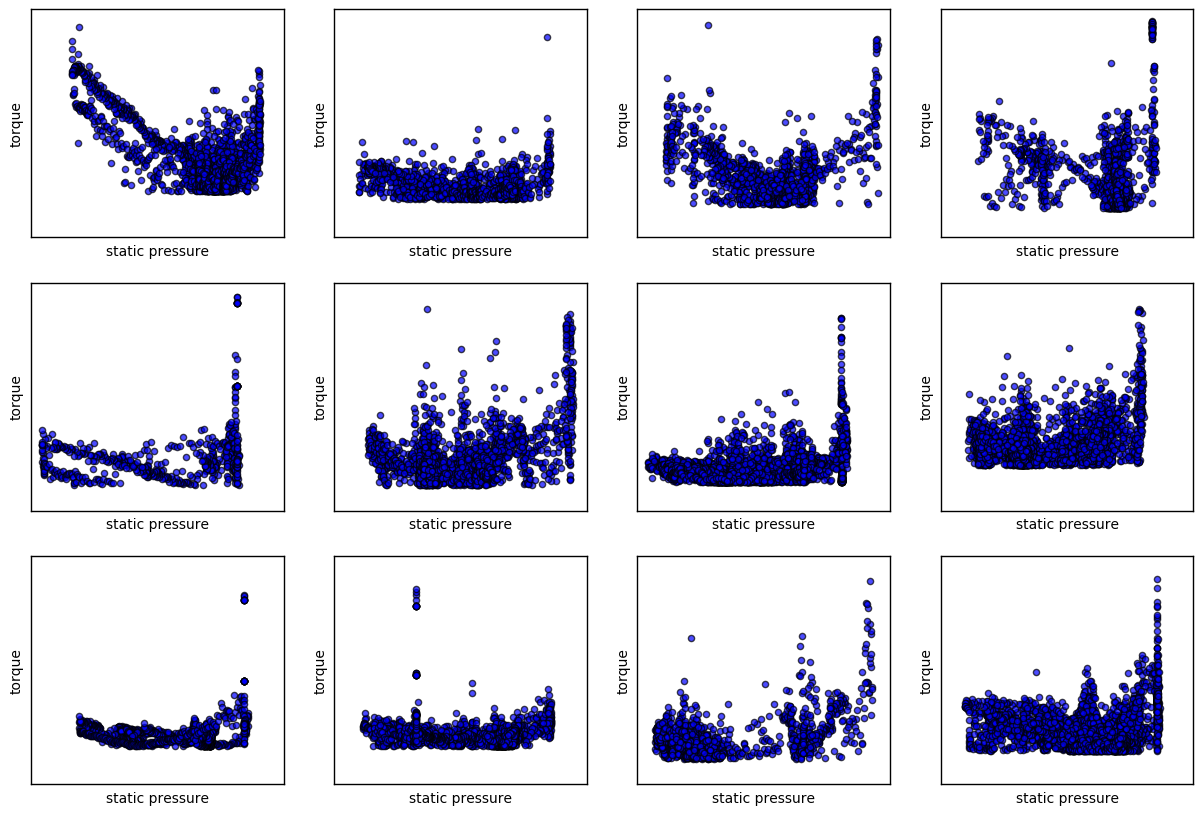

In [195]:
viz_flight_residus('torque', "static pressure", residus_1, df_phase1)

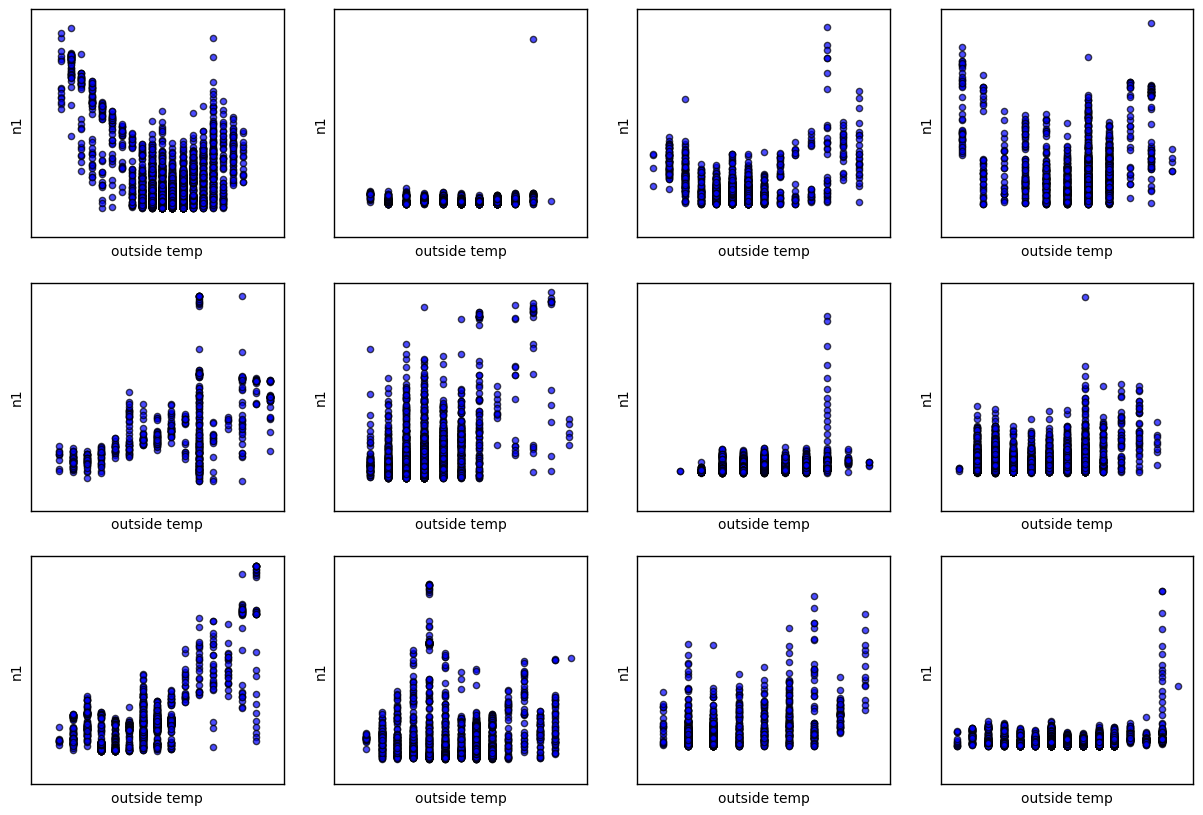

In [196]:
viz_flight_residus('n1', 'outside temp', residus_1, df_phase1)